In [32]:
import pandas as pd
import numpy as np

In [33]:
np.random.seed(41)
n = 100

In [34]:
from numpy.random.mtrand import randint
data=({
    "Stu_ID" : np.arange(1,n+1),
    "Name" : np.random.choice(["Ashna","Bharat","Chetna","Deepu","Angel"],n),
    "Age" : np.random.randint(18,25,n),
    "Int_Marks" : np.random.randint(10,25,n),
    "Ext_Marks" : np.random.randint(16,40,n),
})
df=pd.DataFrame(data)
df

,Stu_ID,Name,Age,Int_Marks,Ext_Marks
0,1,Ashna,19,23,20
1,2,Deepu,23,22,18
2,3,Angel,20,17,37
3,4,Chetna,24,11,37
4,5,Ashna,18,23,23
...,...,...,...,...,...
95,96,Chetna,20,11,30
96,97,Bharat,23,15,28
97,98,Deepu,20,19,30
98,99,Ashna,24,22,38


In [41]:
df["Placed"] = np.where((df["Int_Marks"]>15) & (df["Ext_Marks"]>25),"Yes","No")
df

,Stu_ID,Name,Age,Int_Marks,Ext_Marks,Placed
0,1,Ashna,19,23,20,No
1,2,Deepu,23,22,18,No
2,3,Angel,20,17,37,Yes
3,4,Chetna,24,11,37,No
4,5,Ashna,18,23,23,No
...,...,...,...,...,...,...
95,96,Chetna,20,11,30,No
96,97,Bharat,23,15,28,No
97,98,Deepu,20,19,30,Yes
98,99,Ashna,24,22,38,Yes


In [46]:
df["Final_Marks"] = df["Int_Marks"]+df["Ext_Marks"]
df

,Stu_ID,Name,Age,Int_Marks,Ext_Marks,Placed,Final_Marks
0,1,Ashna,19,23,20,No,43
1,2,Deepu,23,22,18,No,40
2,3,Angel,20,17,37,Yes,54
3,4,Chetna,24,11,37,No,48
4,5,Ashna,18,23,23,No,46
...,...,...,...,...,...,...,...
95,96,Chetna,20,11,30,No,41
96,97,Bharat,23,15,28,No,43
97,98,Deepu,20,19,30,Yes,49
98,99,Ashna,24,22,38,Yes,60


In [47]:
bootstrap= df.sample(n=200, replace=True,random_state=41)
df_aug= pd.concat([df,bootstrap],ignore_index=True)
df_aug

,Stu_ID,Name,Age,Int_Marks,Ext_Marks,Placed,Final_Marks
0,1,Ashna,19,23,20,No,43
1,2,Deepu,23,22,18,No,40
2,3,Angel,20,17,37,Yes,54
3,4,Chetna,24,11,37,No,48
4,5,Ashna,18,23,23,No,46
...,...,...,...,...,...,...,...
295,37,Angel,19,15,25,No,40
296,54,Chetna,18,11,23,No,34
297,67,Ashna,19,12,36,No,48
298,90,Ashna,21,19,31,Yes,50


In [49]:
noise=df_aug.sample(n=150,random_state=41).copy()
noise["Int_Marks"]+=np.random.normal(0,0.1,150)
noise ["Ext_Marks"] +=np.random.normal(-3,4,150)
df_aug = pd.concat([df_aug,noise],ignore_index=True)
df_aug

,Stu_ID,Name,Age,Int_Marks,Ext_Marks,Placed,Final_Marks
0,1,Ashna,19,23.000000,20.000000,No,43
1,2,Deepu,23,22.000000,18.000000,No,40
2,3,Angel,20,17.000000,37.000000,Yes,54
3,4,Chetna,24,11.000000,37.000000,No,48
4,5,Ashna,18,23.000000,23.000000,No,46
...,...,...,...,...,...,...,...
445,18,Deepu,21,23.070440,13.836922,No,40
446,8,Bharat,22,14.046064,11.950266,No,33
447,53,Bharat,21,11.886453,11.570769,No,28
448,62,Chetna,23,23.076715,28.451979,Yes,57


In [50]:
df_aug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Stu_ID       450 non-null    int64  
 1   Name         450 non-null    object 
 2   Age          450 non-null    int64  
 3   Int_Marks    450 non-null    float64
 4   Ext_Marks    450 non-null    float64
 5   Placed       450 non-null    object 
 6   Final_Marks  450 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 24.7+ KB


In [53]:

import matplotlib.pyplot as plt

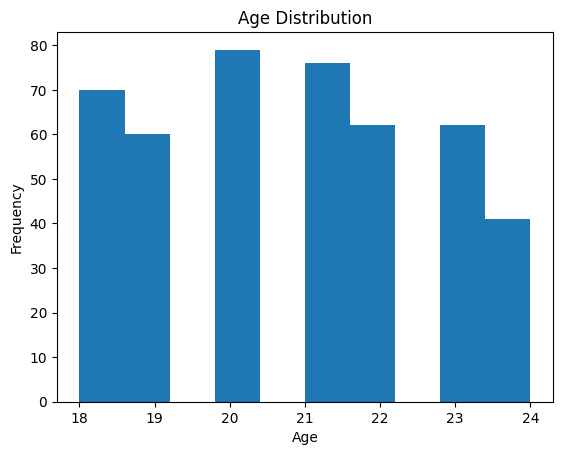

In [58]:
plt.figure()
plt.hist(df_aug["Age"])

plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution")
plt.show()
